In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data, we are using the training csv from Kaggle Digit Recognizer 
# https://www.kaggle.com/c/digit-recognizer/data
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# using numpy arrays to apply linear algebra
data = np.array(data)
r, c = data.shape
np.random.shuffle(data)

# splitting into train and val sets
data_val = data[0:1000].T
Y_test = data_val[0]
X_test = data_val[1:c]
X_test = X_test / 255.

data_train = data[1000:r].T
Y_train = data_train[0]
X_train = data_train[1:c]
X_train = X_train / 255.


In [5]:
# initialise all the parameters we need
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [6]:
# we are going to use the relu and softmax functions, let's define them:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

# derivative of relu
def der_ReLU(Z):
    return Z > 0

In [7]:
# one hot encoding function
def oh_encoder(Y):
    oh_Y = np.zeros((Y.size, Y.max() + 1))
    oh_Y[np.arange(Y.size), Y] = 1
    oh_Y = oh_Y.T
    return oh_Y

In [8]:
# define de forward pass
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [9]:
# define the backpropagation function
def back_propagation(Z1, A1, Z2, A2, W2, X, Y):
    r = Y.size
    oh_Y = oh_encoder(Y)

    dZ2 = A2 - oh_Y
    dW2 = 1 /  r * dZ2.dot(A1.T)
    db2 = 1 / r * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * der_ReLU(Z1)
    dW1 = 1 /  r * dZ1.dot(X.T)
    db1 = 1 / r * np.sum(dZ1)

    return dW1, db1, dW2, db2

In [10]:
# define the update parameters function
def upd_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [11]:
# define the gradient descent method
def grad_descent(X, Y, iter, alpha):
    W1, b1, W2, b2 = init_params()

    accuracy = []

    for i in range(iter):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = upd_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        accuracy.append(get_accuracy(get_preds(A2), Y))

        if i % 50 == 0:
            print('Iteration: ', i)
            print('Accuracy: ', accuracy[-1])
            print('--------------------------------------')

    return accuracy, W1, b1, W2, b2

In [12]:
# UTILITY FUNCTIONS

# get the predictions
def get_preds(A2):
    return np.argmax(A2, 0)

# get the accuracy from the predictions
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# make predictions with trained model
def predictor(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    preds = get_preds(A2)
    return preds

# test predictions on a particular image
def test_image(image_idx, W1, b1, W2, b2):
    image = X_test[:, image_idx, None]
    pred = predictor(image, W1, b1, W2, b2)
    true_label = Y_test[image_idx]

    print('Predicted number: ', pred)
    print('True number: ', true_label)

    image_plot = image.reshape((28, 28)) * 255
    plt.figure()
    plt.gray()
    plt.imshow(image_plot, interpolation = 'nearest')
    plt.show()



In [13]:
# Training 
ITER = 800
ALPHA = 0.1

accuracy, W1, b1, W2, b2 = grad_descent(X_train, Y_train, ITER, ALPHA)

Iteration:  0
Accuracy:  0.08265853658536586
--------------------------------------
Iteration:  50
Accuracy:  0.48621951219512194
--------------------------------------
Iteration:  100
Accuracy:  0.6261463414634146
--------------------------------------
Iteration:  150
Accuracy:  0.7065365853658536
--------------------------------------
Iteration:  200
Accuracy:  0.7551707317073171
--------------------------------------
Iteration:  250
Accuracy:  0.7846585365853659
--------------------------------------
Iteration:  300
Accuracy:  0.8059024390243903
--------------------------------------
Iteration:  350
Accuracy:  0.8212926829268292
--------------------------------------
Iteration:  400
Accuracy:  0.8329024390243902
--------------------------------------


KeyboardInterrupt: 

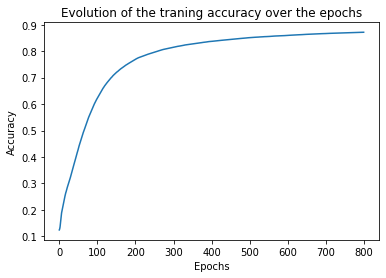

In [ ]:
# plot the evolution of the accuracy over the epochs
plt.figure()
plt.plot(np.arange(ITER), accuracy)
plt.title('Evolution of the traning accuracy over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Predicted number:  [0]
True number:  0


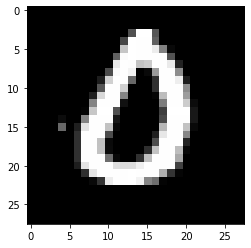

In [ ]:
test_image(4, W1, b1, W2, b2)

In [14]:
# Compute the accuracy of the test data
test_preds = predictor(X_test, W1, b1, W2, b2)
print('Test Accuracy: ', get_accuracy(test_preds, Y_test))

NameError: name 'W1' is not defined